In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.signal import argrelextrema
import time

from math import *

In [3]:
W=2*np.pi
T=(2*np.pi)/W
n=50
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]
p=int(round(T/h))

d=0.25
dd=-0.2

dw=0.1

In [8]:
exlen=[]
ex1=[]
ex2=[]

for k in range(100):

    start = time.time()
    s=20*k
    k0=np.array([d]*N_grid)
    k0[2*p:2*p+s]=d+dd
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h
            
            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)
    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid
    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    dmin=argrelextrema(k_hat, np.less)
    n_min=dmin[0].shape[0]
    extr=[]

    eps=0.001

    for i in range(n_min):
        if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
             or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
             or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
             and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
                 extr.append(dmin[0][i])

    dk=np.diff(k_hat)/h
    dk=np.nan_to_num(dk)
        
    if (max(dk)>15) or (len(extr)==0):
        exlen.append(nan)
        ex1.append(nan)
        ex2.append(nan)
    else:
        if ((len(extr)>1) and (extr[0]<=2*p+s) and (extr[1]>2*p+s)):
            exlen.append(extr[1]-extr[0])
            ex1.append(k_hat[extr[0]])
            ex2.append(k_hat[extr[1]])
        else:
            exlen.append(0)
            ex1.append(k_hat[extr[0]])
            ex2.append(k_hat[extr[0]])
    stop = time.time()        
    print(k, stop-start, '-------', exlen[-1])
    
np.savetxt('PT1409_50_10000_extr2_len.out', exlen, delimiter=',')
np.savetxt('PT1409_50_10000_extr2_ex1.out', ex1, delimiter=',')
np.savetxt('PT1409_50_10000_extr2_ex2.out', ex2, delimiter=',')

/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)


0 4.565080404281616 ------- nan
1 4.654645204544067 ------- 0
2 4.560354471206665 ------- 0
3 4.56456446647644 ------- 0
4 4.6423492431640625 ------- 0
5 4.704646825790405 ------- 0
6 5.009050369262695 ------- 0
7 4.914963722229004 ------- 0
8 4.92045521736145 ------- 0
9 5.003755569458008 ------- 0
10 4.7417755126953125 ------- 0
11 4.687137603759766 ------- 0
12 4.785808324813843 ------- 0
13 4.687680006027222 ------- 0
14 5.167880296707153 ------- 0
15 4.90545392036438 ------- 0
16 4.931045770645142 ------- 0
17 4.958466053009033 ------- 0
18 4.966960668563843 ------- 0
19 4.915508508682251 ------- 0
20 5.293238401412964 ------- 0
21 5.01567816734314 ------- 0
22 4.963740587234497 ------- 0
23 4.990641117095947 ------- 0
24 4.961983919143677 ------- 0
25 4.904805660247803 ------- 0
26 4.974780321121216 ------- 0
27 4.912419557571411 ------- 0
28 5.225985765457153 ------- 0
29 5.1615684032440186 ------- 0
30 5.174726247787476 ------- 0
31 5.155076742172241 ------- 0
32 5.288359880447

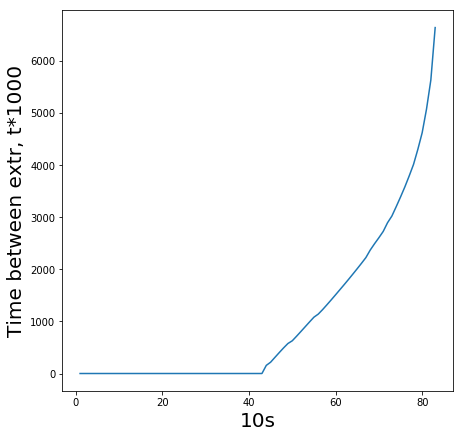

In [18]:
exlen[84]=nan
plt.figure(figsize=(7,7))
plt.xlabel(r'10s', fontsize=20)
plt.ylabel(r'Time between extr, t*1000', fontsize=20)
plt.plot(exlen)
plt.show()

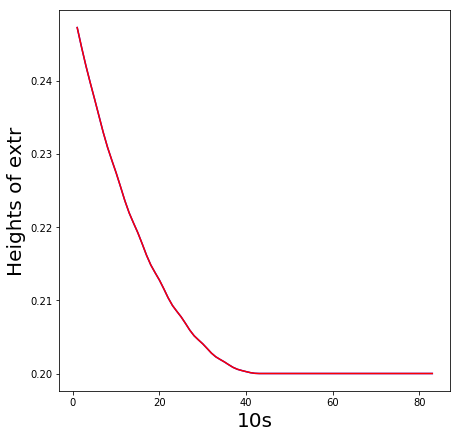

In [19]:
ex1[84]=nan
ex2[84]=nan
plt.figure(figsize=(7,7))
plt.xlabel(r'10s', fontsize=20)
plt.ylabel(r'Heights of extr', fontsize=20)
plt.plot(ex1, 'b')
plt.plot(ex2, 'r')
plt.show()

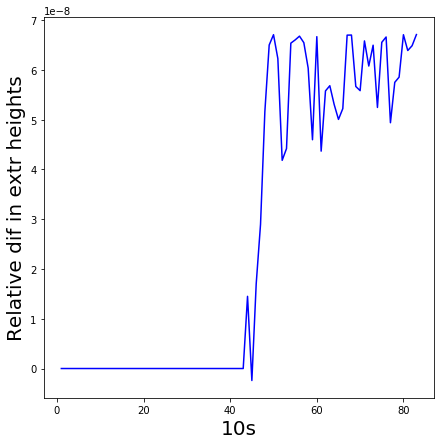

In [21]:
ex1[84]=nan
ex2[84]=nan
plt.figure(figsize=(7,7))
plt.xlabel(r'10s', fontsize=20)
plt.ylabel(r'Relative dif in extr heights', fontsize=20)
plt.plot(np.array(ex2)/dd-np.array(ex1)/dd, 'b')
plt.show()